In [1]:
import os
from astropy.io import fits
from scipy.ndimage import median_filter, map_coordinates
import numpy as np
from astropy.wcs import WCS
import matplotlib.pyplot as plt
from glob import glob
from astropy.modeling import models
from astropy import coordinates as coord
from astropy import units as u
from gwcs import wcs
from gwcs import coordinate_frames as cf
import destreak 
from image1overf import sub1fimaging

In [2]:
#crowded = fits.open("data/jw01074001001_02101_00001_nrca1_rate.fits")

In [3]:
#files = glob("data/*")
#for f in files: 
#    plt.imshow(np.nan_to_num(fits.open(f)['SCI'].data), vmin=-1, vmax=1)
#    plt.title(f[5:])
#    plt.show()

Text(0.5, 1.0, 'jw01074001001_02101_00001_nrca1_cal.fits')

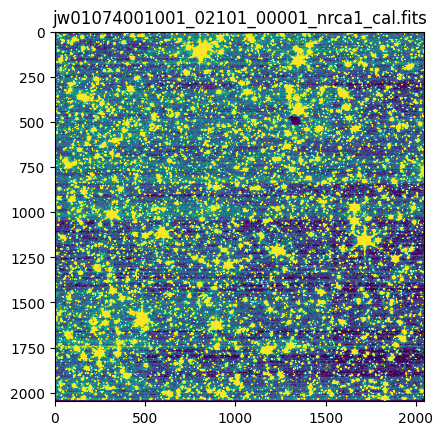

In [4]:
f = "data/jw01074001001_02101_00001_nrca1_cal.fits"
#f = "data/jw01345001001_10201_00001_nrca3_cal.fits"
#f = "data/jw02107025001_02101_00001_nrcb2_cal.fits"
data = fits.open(f)['SCI'].data
plt.imshow(np.nan_to_num(data), vmin=0, vmax=1)
plt.title(f[5:])

In [5]:
output = sub1fimaging(fits.open(f), 3.0, 2.0, False, True)

Text(0.5, 1.0, 'jw01074001001_02101_00001_nrca1_cal.fits')

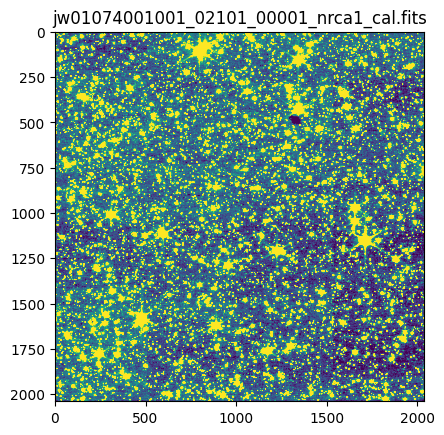

In [6]:
data_out = output
plt.imshow(np.nan_to_num(data_out), vmin=0, vmax=1)
plt.title(f[5:])

In [7]:
fits.open(f)[0].header['FILTER']

'F070W'

In [8]:
#zero_space = compute_zero_spacing_approximation(f)

#print(fn)
#with warnings.catch_warnings():
#    # specifically ignoring that we're using non-integer 
#    warnings.simplefilter('ignore')
#    dx = 128 if 'f4' in fn else 256
#    sl = 'long' if 'f4' in fn else 'short'
#    regs = regions.Regions.read(f'{basepath}/regions_/bright_stars_{sl}.reg')
#    tp = compute_zero_spacing_approximation(fn, ext=1, dx=dx, regs=regs, percentile=10, progressbar=tqdm)
#    #if np.nanpercentile(tp.data, 10) < 0:
#    #    print(np.nanpercentile(tp.data, 10))
#    #    tp.data -= np.nanpercentile(tp.data, 10)
#    #tp.data[tp.data<0] = 0
#    tp.writeto(fn.replace("_i2d.fits", f"_i2d_medfilt{dx}.fits"), overwrite=True)
#    print(fn)
#    print(fn.replace("_i2d.fits", f"_i2d_medfilt{dx}.fits"))

In [9]:
out_destreak = destreak.destreak(f, percentile=10, median_filter_size=256, overwrite=True, write=True,
             #background_folder='/orange/adamginsburg/jwst/brick/images/',
             #background_mapping=background_mapping,
             use_background_map=False
             )

Destreaking data/jw01074001001_02101_00001_nrca1_cal.fits


/home/savannahgramze/anaconda3/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1395: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


Text(0.5, 1.0, 'jw01074001001_02101_00001_nrca1_destreak.fits')

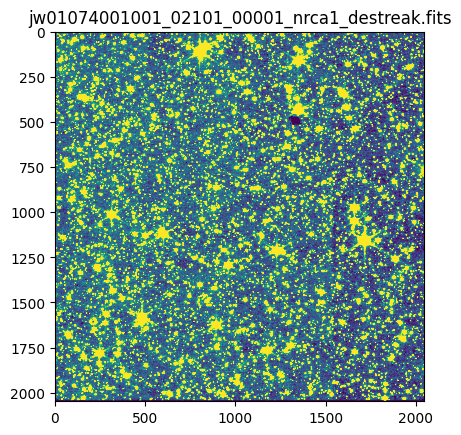

In [10]:
d = out_destreak
data_out_destreak = fits.open(d)['SCI'].data
plt.imshow(np.nan_to_num(data_out_destreak), vmin=0, vmax=1)
plt.title(d[5:])

Text(0.5, 1.0, 'destreak')

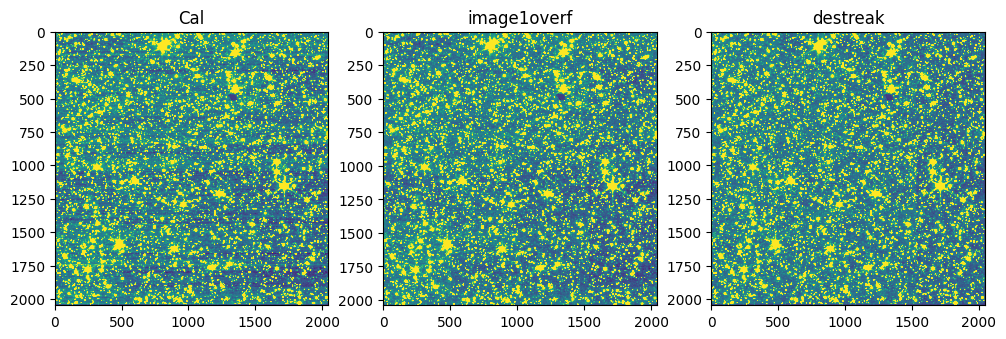

In [11]:
fig, axs = plt.subplots(1,3, figsize=(12, 12))
minn = 5
maxx = 90

c_min = np.nanpercentile(data.flatten(), minn)
c_max = np.nanpercentile(data.flatten(), maxx)
axs[0].imshow(np.nan_to_num(data), vmin=c_min, vmax=c_max)
axs[0].set_title("Cal")

f_min = np.nanpercentile(data_out.flatten(), minn)
f_max = np.nanpercentile(data_out.flatten(), maxx)
axs[1].imshow(np.nan_to_num(data_out), vmin=f_min, vmax=f_max)
axs[1].set_title("image1overf")

d_min = np.nanpercentile(data_out_destreak.flatten(), minn)
d_max = np.nanpercentile(data_out_destreak.flatten(), maxx)
axs[2].imshow(np.nan_to_num(data_out_destreak), vmin=d_min, vmax=d_max)
axs[2].set_title("destreak")

